In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine,inspect, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
first_row_measurement = session.query(Measurement).first()
first_row_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x12c5453c0>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0}

In [12]:
first_row_station = session.query(Station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x12c544e20>,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0}

In [13]:
#session.query(Measurement.date).order_by(Measurement.date.desc()).first()

In [14]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

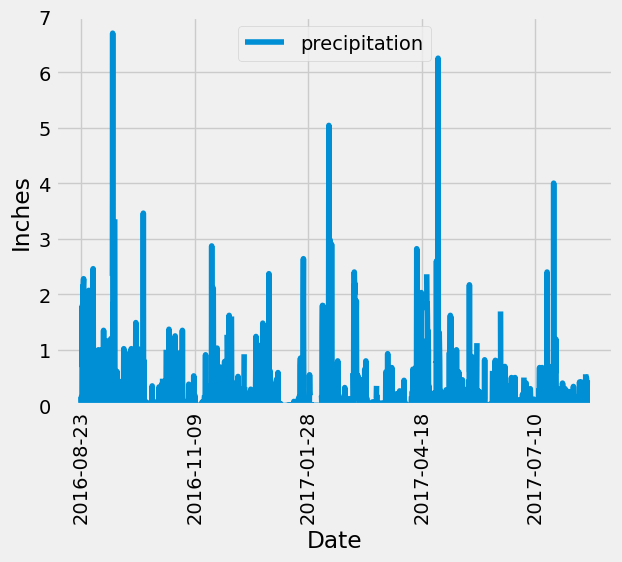

In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date
# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores

date_prcp_scores = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= year_ago).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names

date_prcp_df = pd.DataFrame(date_prcp_scores, columns=['date','precipitation'])

# Sort the dataframe by date

sorted_date_prcp_df = date_prcp_df.sort_values(by=['date'])

# Use Pandas Plotting with Matplotlib to plot the data

sorted_date_prcp_df=sorted_date_prcp_df.set_index("date")
sorted_date_prcp_df.plot(xlabel='Date', ylabel='Inches')
plt.ylim(0,7)
plt.xticks(rotation=90)
plt.show()

In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
sorted_date_prcp_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).all()
total_stations

[(9,)]

In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations_list_count = session.query(Measurement.station, func.count(Measurement.station)).\
                                order_by(func.count(Measurement.station).desc()).\
                                group_by(Measurement.station).all()
stations_list_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = session.query(Measurement.station).\
                                order_by(func.count(Measurement.station).desc()).\
                                group_by(Measurement.station).first()
active_station_number = active_station[0]
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
                                filter(Measurement.station == active_station_number).all()


[(54.0, 85.0, 71.66378066378067)]

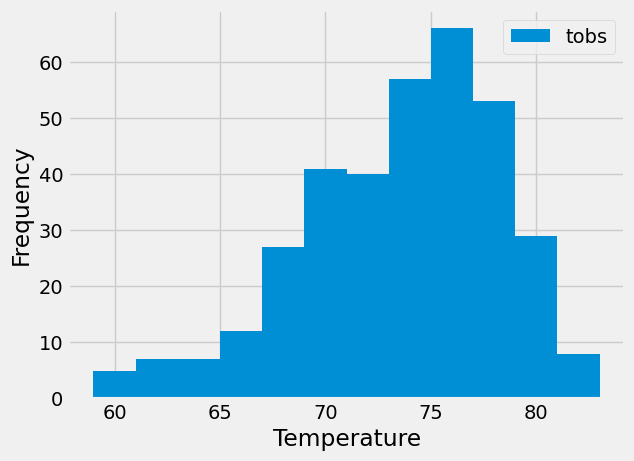

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last_12_months_temp = session.query(Measurement.date, Measurement.tobs).\
                    filter(Measurement.station == active_station_number).\
                    filter(Measurement.date >= year_ago).all()
temp_df = pd.DataFrame(last_12_months_temp)
temp_df.plot(kind = 'hist',bins =12)
plt.xlabel('Temperature')
plt.show()

# Close Session

In [24]:
# Close Session
session.close()